In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter

# Load Dataset

In [2]:
df = pd.read_csv('data/ENFJ.csv')

df.head()

Unnamed: 0  num                      title                          content
0           1    5                   사랑해요 엔프제           천사가 있다면 당신일 것         
1           2    6                         ㅎㅇ                       너희들 다 내 거임
2           3    7                 엔프제 갤러리 특)           엔프제는 없고엔프제를 보려는 관객만 있다
3           4    8  갤주는 갤이름 대문자로 바꿔라. ㅈㄴ 불편하네                              NaN
4           5    9                       ㅎㅇㅎㅇ                        엔갤 흥하길 바람

# Remove Empty Spaces

In [12]:
df['title'] = df['title'].str.strip()
df['content'] = df['content'].str.strip()
df['title'].replace('', np.nan, inplace=True)
df['content'].replace('', np.nan, inplace=True)
df = df.dropna()

df.head()

Unnamed: 0  num       title                 content
0           1    5    사랑해요 엔프제           천사가 있다면 당신일 것
1           2    6          ㅎㅇ              너희들 다 내 거임
2           3    7  엔프제 갤러리 특)  엔프제는 없고엔프제를 보려는 관객만 있다
4           5    9        ㅎㅇㅎㅇ               엔갤 흥하길 바람
5           6   12  엔프제 노무 부러워              니네 성격 나줘ㅡㅡ

# Extract Nouns

In [14]:
extractor = Hannanum()

nouns = []

for i, row in tqdm(df.iterrows()):
    _, num, title, content = row

    if title and type(title) is str:
        nouns.extend(extractor.nouns(title))
    if content and type(content) is str:
        nouns.extend(extractor.nouns(content))

0it [00:00, ?it/s]

0


23it [00:02,  1.95s/it]

1
2
4
5
6
7
8
9
10
11
13
14
15
16
17
18
19
20
21
22
24
25
26
27
28
29
30
31
32
33
34
35
36
37


52it [00:03,  1.04it/s]

38
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
62
63
64
66
67
68
69
70
71
72
73
74
75
76
78


88it [00:04,  2.83it/s]

79
80
81
82
83
84
85
86
88
89
90
91
92
93
94
95
96
97
99
100
101
102
103
104
105


107it [00:04,  5.57it/s]

106
107
108
109
110
111
112
113
114
115
117
119
120
121
122
123


128it [00:04,  7.87it/s]

124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


156it [00:04, 14.87it/s]

149
150
151
152
153
155
156
157
158
159
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176


181it [00:05, 26.36it/s]

177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194


192it [00:05, 25.81it/s]

195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
220
221
222
223
224
225
226
227


236it [00:05, 45.44it/s]

228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
247
248
249
250
252
253
254
255
256
257
258
259
260


268it [00:06, 68.66it/s]

261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285


288it [00:06, 83.37it/s]

286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
304
305
306
307
308
310
311
312
313


320it [00:06, 102.60it/s]

314
315
316
317
318
319
321
322
323
324
325
326
327
328
329
330
331
332
333
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352


334it [00:06, 64.04it/s] 

353
354
355
356


345it [00:07, 47.08it/s]

357
358
359
360
361
362
363
364
365
366
367


367it [00:07, 65.88it/s]

368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388


393it [00:07, 85.29it/s]

389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416


404it [00:07, 83.02it/s]

417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
435
436
437


433it [00:08, 97.51it/s]

438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
468
469
470
471
474
475
476


471it [00:08, 98.46it/s]

477
478
479
480
481
482
483
484
485
486
487
489
490
491
492
493
494
495
496
497


482it [00:08, 90.68it/s]

498
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515


492it [00:08, 85.33it/s]

516
517
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536


527it [00:09, 94.16it/s]

537
538
539
540
542
543
544
545
546
547
548
549
550
551
552
553
555
556
557
558
559
560
561
562
563
564
565
566


551it [00:09, 96.18it/s]

567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585


573it [00:09, 97.28it/s]

586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607


597it [00:09, 104.96it/s]

608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633


621it [00:10, 105.57it/s]

634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657


643it [00:10, 103.45it/s]

658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681


671it [00:10, 108.54it/s]

682
683
684
685
686
687
688
689
691
692
693
694
695
696
697
698
699
700
701
702
703


703it [00:10, 65.86it/s] 

704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734


# Count Same Words

In [15]:
count = Counter(nouns)
words = dict(count.most_common())
print(words)

{'나': 751, '사람': 439, '것': 403, '엔프제': 311, '생각': 226, '말': 179, '때': 162, '수': 154, '내': 144, '친구': 127, '진짜': 104, '성격': 101, '데': 95, '일': 88, '근데': 79, '뭐': 79, '너': 75, '사람들': 74, '얘': 72, '친구들': 71, '마음': 70, '여자': 69, '사랑': 64, '글': 64, '이': 58, '자기': 51, '적': 50, '지': 49, '이야기': 48, '유형': 46, '대화': 46, '엔프제들': 46, '주변': 46, '상처': 45, '애': 44, '기분': 44, '관계': 44, '라': 44, '우리': 43, '들': 43, '중': 42, '편': 41, '거': 40, '남자': 40, '남': 39, '상대': 36, '하나': 35, '한번': 35, '듯': 35, '행복': 35, '등': 35, '그': 34, '오늘': 34, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '저': 30, '뭔가': 30, '존': 30, '감정': 30, '누구': 30, '전': 29, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '다들': 28, '줄': 28, '속': 27, '상대방': 27, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '눈': 26, '앞': 25, '비슷': 24, '칭찬': 24, '시간': 24, '이유': 23, '예전': 23, '진심': 22, '평소': 22, '세상': 22, '집': 22, '인생': 21, '관심': 21, '서로': 21, '얘기': 21, '2': 20, '갤': 20, 'ㅋㅋㅋㅋㅋ': 20, '너희': 20,

# Remove Minority
- Remove the word length is 1
- Remove the word frequency is 1

In [16]:
for word in list(words.keys()):
    if len(word) == 1:
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]
        
print(words)

{'사람': 439, '엔프제': 311, '생각': 226, '친구': 127, '진짜': 104, '성격': 101, '근데': 79, '사람들': 74, '친구들': 71, '마음': 70, '여자': 69, '사랑': 64, '자기': 51, '이야기': 48, '유형': 46, '대화': 46, '엔프제들': 46, '주변': 46, '상처': 45, '기분': 44, '관계': 44, '우리': 43, '남자': 40, '상대': 36, '하나': 35, '한번': 35, '행복': 35, '오늘': 34, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '뭔가': 30, '감정': 30, '누구': 30, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '다들': 28, '상대방': 27, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '비슷': 24, '칭찬': 24, '시간': 24, '이유': 23, '예전': 23, '진심': 22, '평소': 22, '세상': 22, '인생': 21, '관심': 21, '서로': 21, '얘기': 21, 'ㅋㅋㅋㅋㅋ': 20, '너희': 20, '부분': 20, '모습': 19, '호감': 19, '공감': 19, '지금': 19, 'ㅋㅋ': 19, '계획': 19, '분위기': 19, '사이': 19, '인프피': 18, '문제': 18, '그때': 18, '마스크': 18, '궁합': 17, '선물': 17, '노력': 17, '인팁': 17, '질문': 17, '그것': 17, '엄마': 17, '그녀': 17, '인프제': 16, '필요': 16, '소리': 16, '1.': 16, 'ㅋㅋㅋ': 16, '술자리': 16, '인간': 15, 'ㅠㅠ': 15, '미안': 15, '우울': 15, '완전'

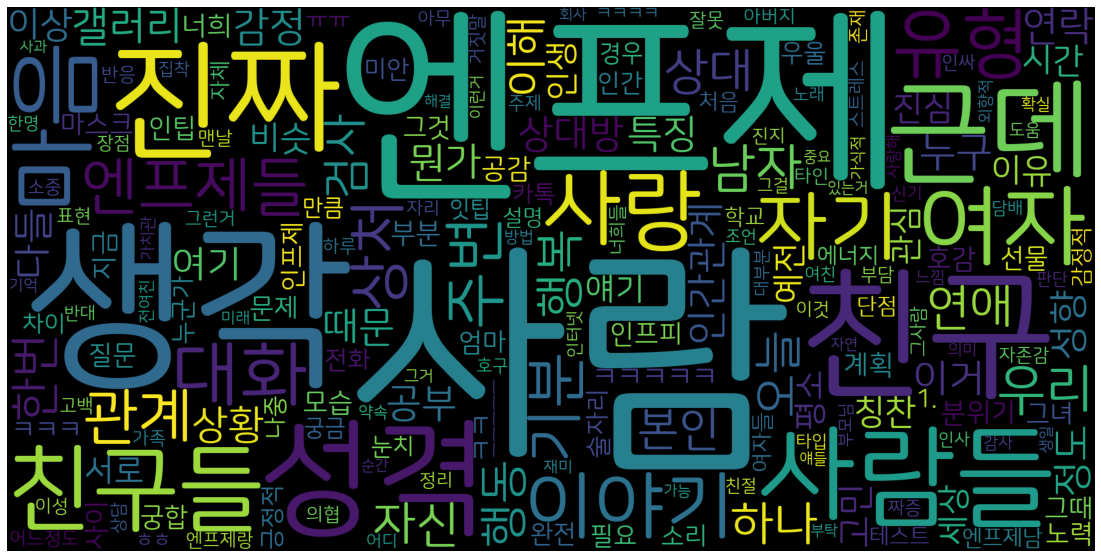

In [17]:
wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Functionalize

In [25]:
def create_wordcloud(csv_path):
    df = pd.read_csv(csv_path)
    
    df['title'] = df['title'].str.strip()
    df['content'] = df['content'].str.strip()
    df['title'].replace('', np.nan, inplace=True)
    df['content'].replace('', np.nan, inplace=True)
    df = df.dropna()
    
    extractor = Hannanum()

    nouns = []

    for i, row in tqdm(df.iterrows()):
        _, num, title, content = row

        if title and type(title) is str:
            nouns.extend(extractor.nouns(title))
        if content and type(content) is str:
            nouns.extend(extractor.nouns(content))
            
    count = Counter(nouns)
    words = dict(count.most_common())

    for word in list(words.keys()):
        if len(word) == 1:
            del words[word]
            continue

        if words[word] == 1:
            del words[word]

    wc = WordCloud(
        font_path='NanumSquareRoundR.ttf',
        width=2000,
        height=1000
    ).generate_from_frequencies(words)

    plt.figure(figsize=(20, 10))
    plt.title(csv_path)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

# Result

703it [00:05, 119.14it/s]


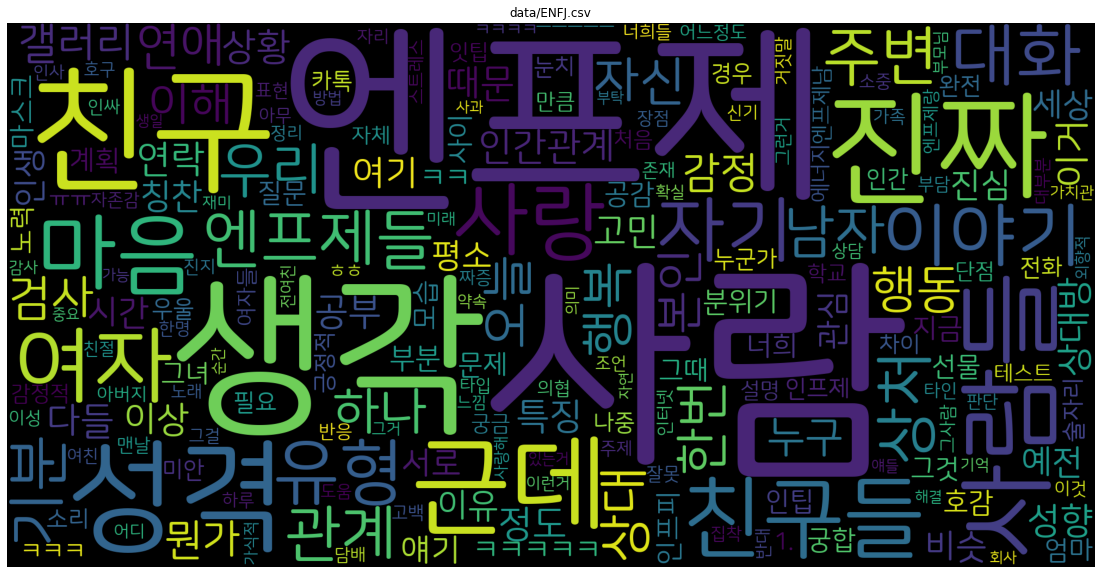

676it [00:04, 154.67it/s]


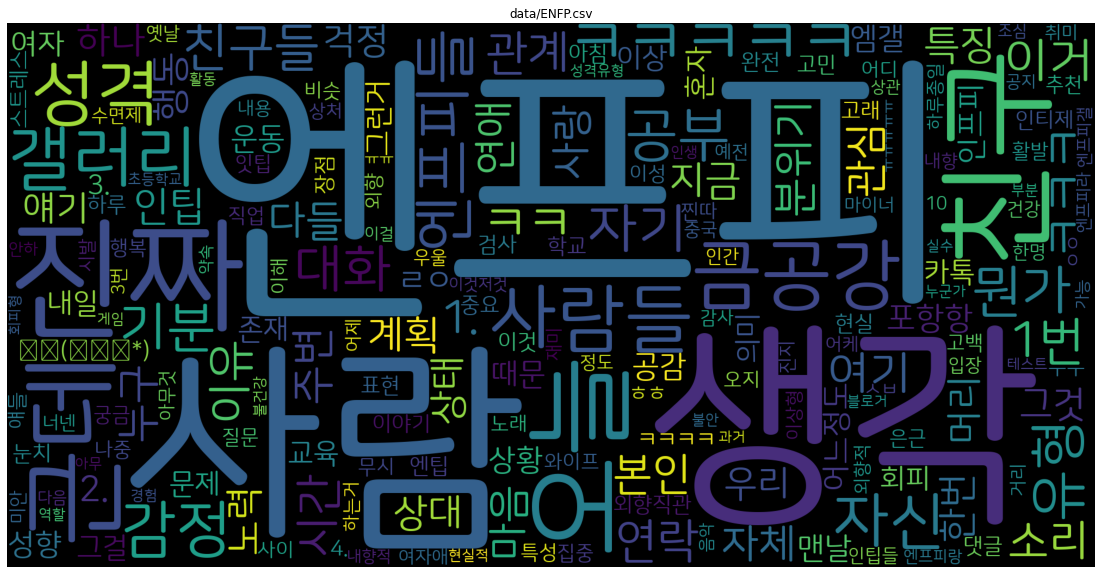

661it [00:06, 103.41it/s]


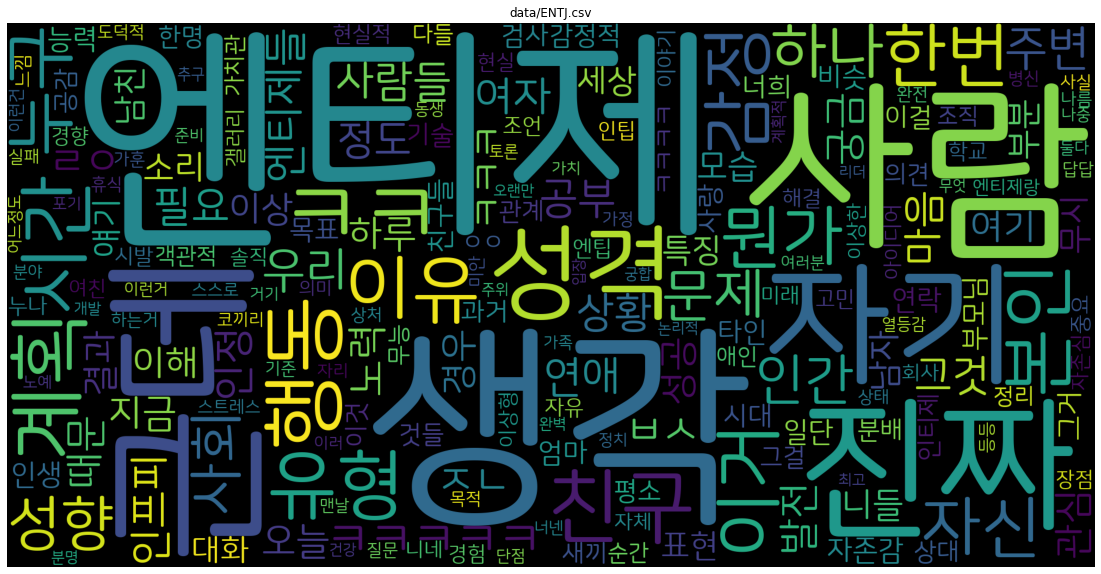

713it [00:03, 184.06it/s]


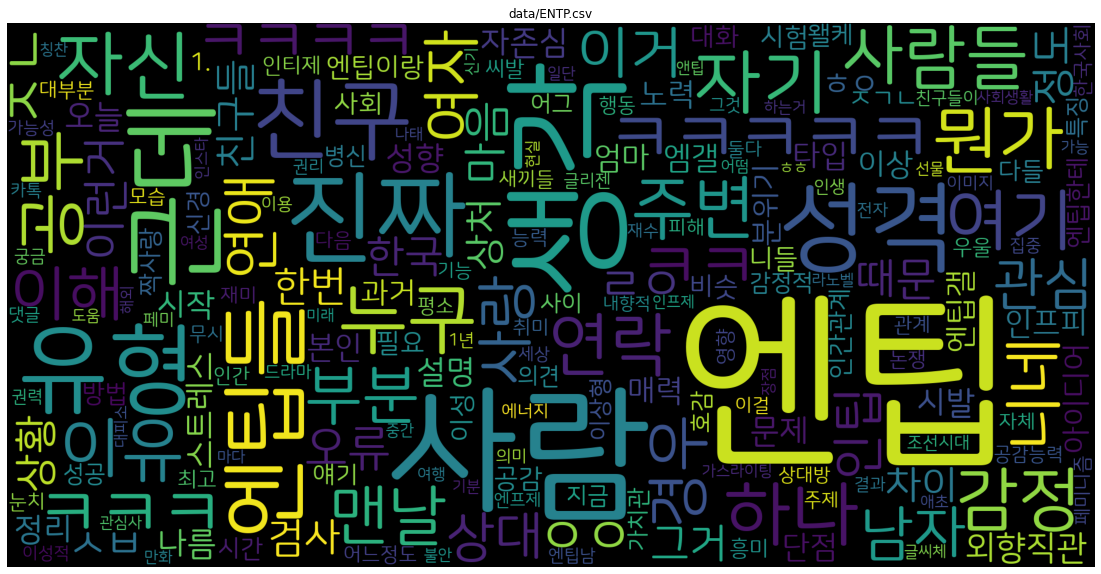

382it [00:02, 152.76it/s]


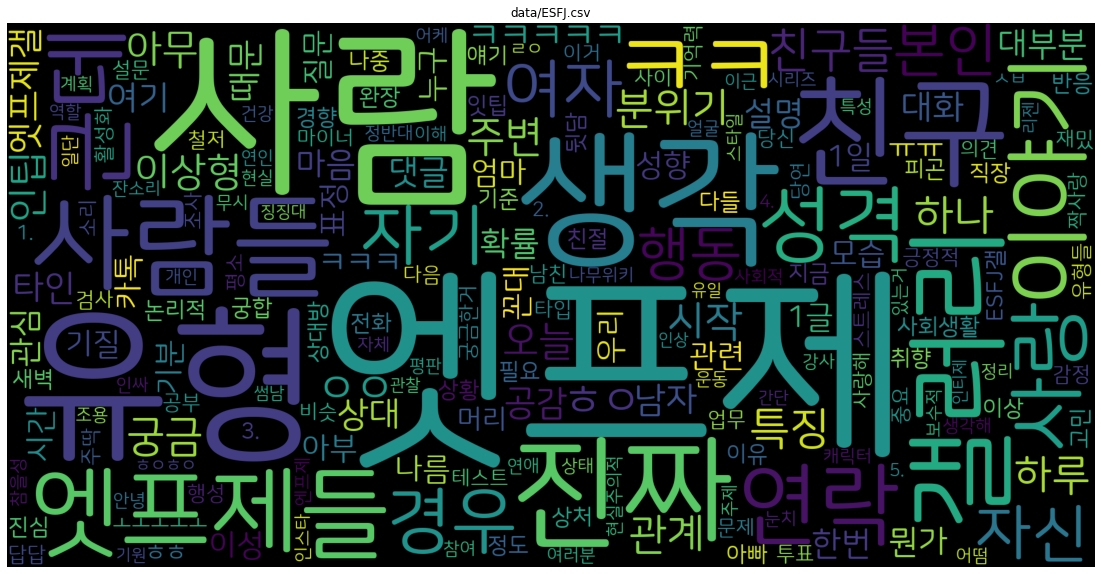

568it [00:03, 188.08it/s]


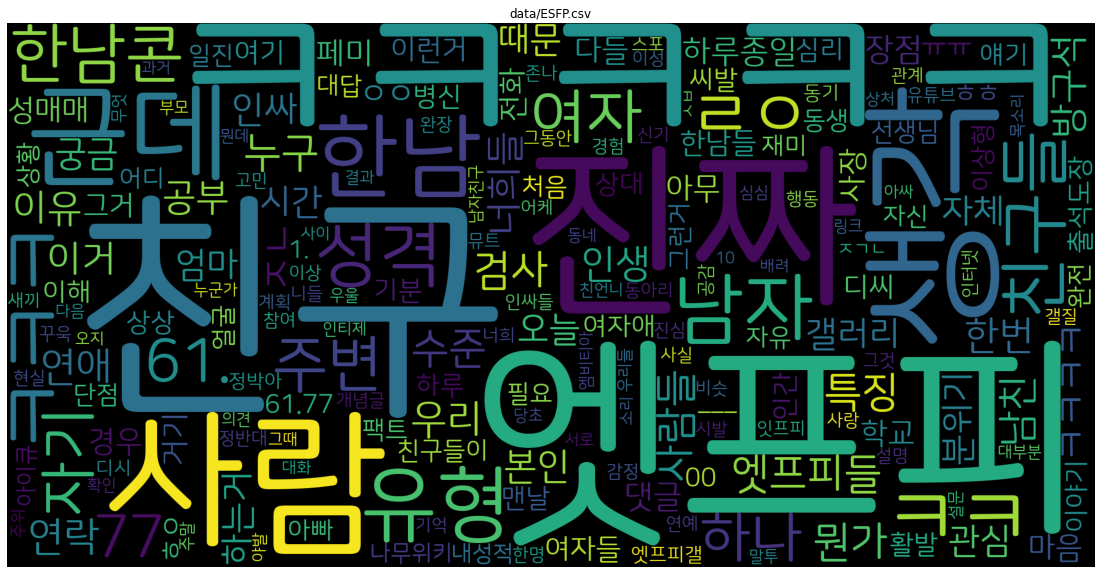

370it [00:04, 87.93it/s] 


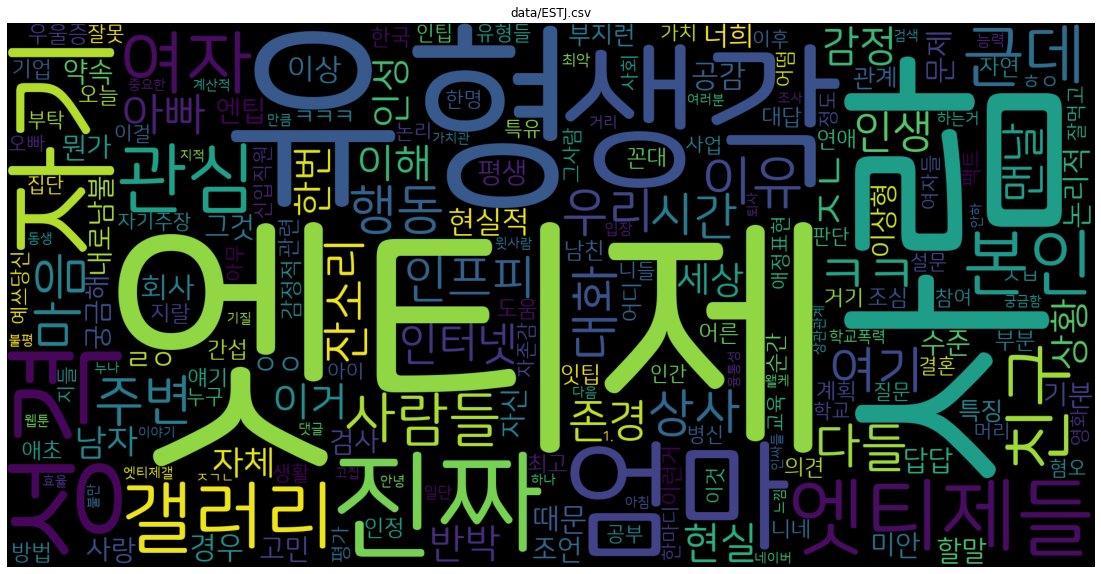

738it [00:04, 150.86it/s]


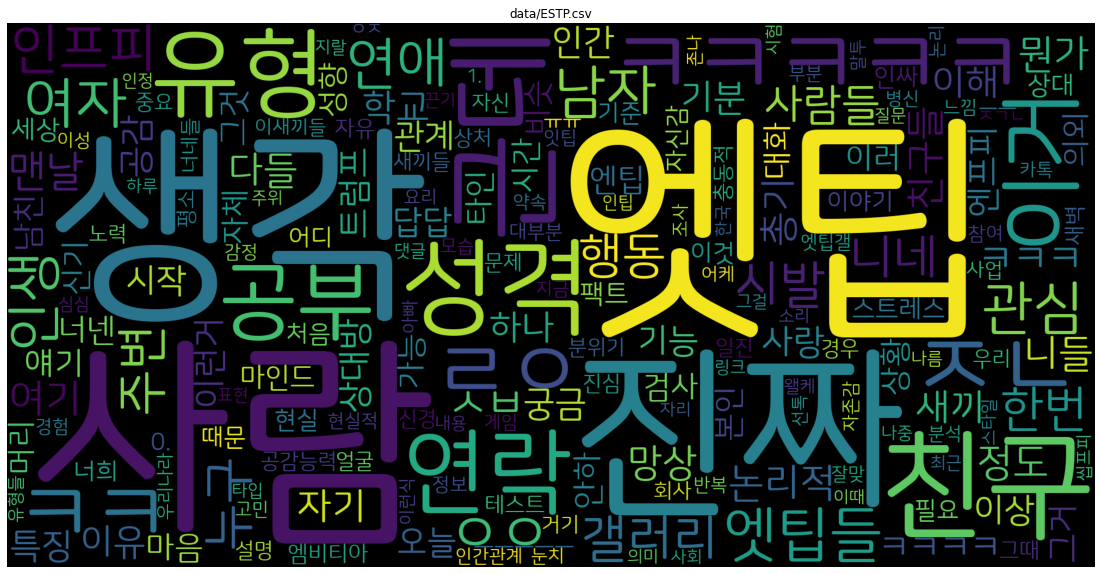

723it [00:14, 50.78it/s] 


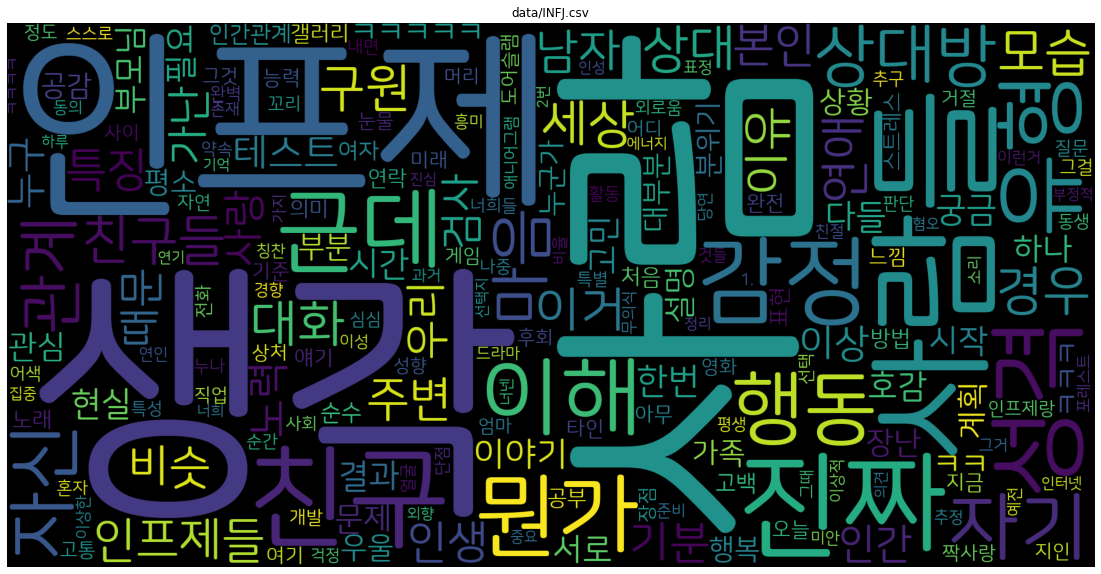

546it [00:02, 224.19it/s]


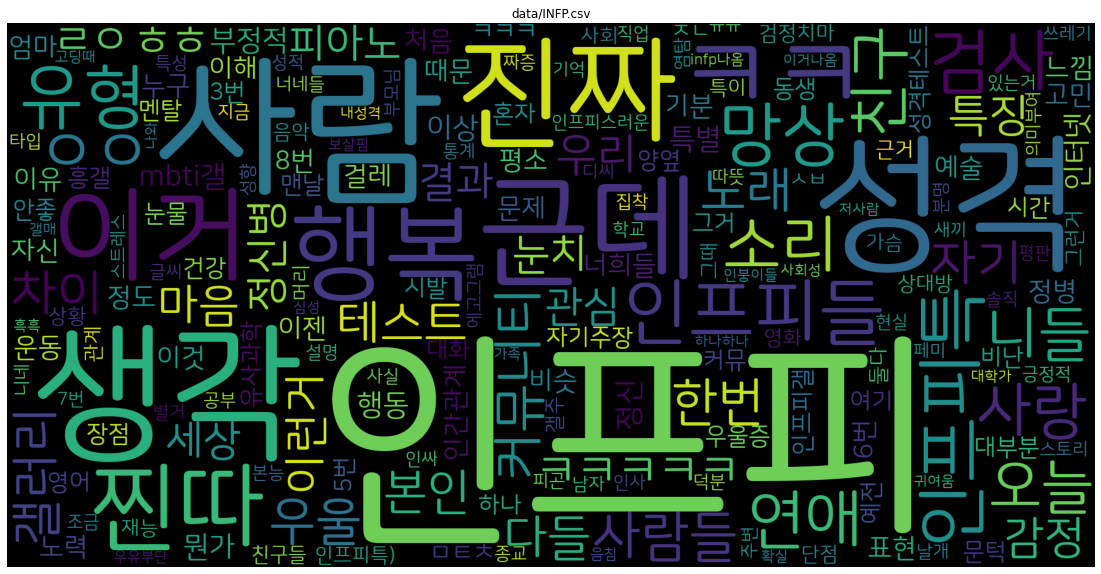

496it [00:03, 146.63it/s]


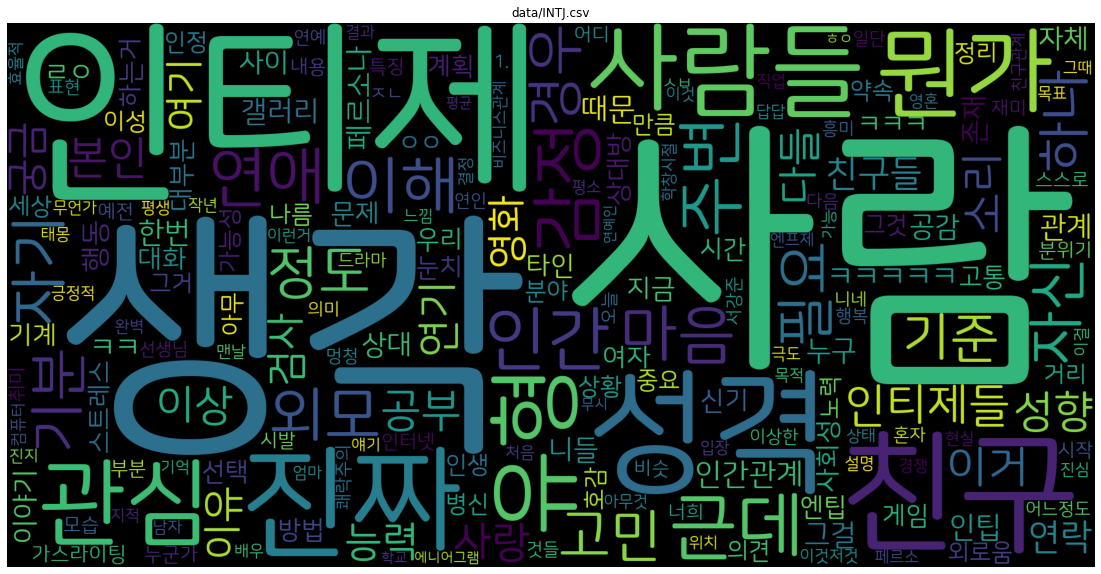

724it [00:05, 136.07it/s]


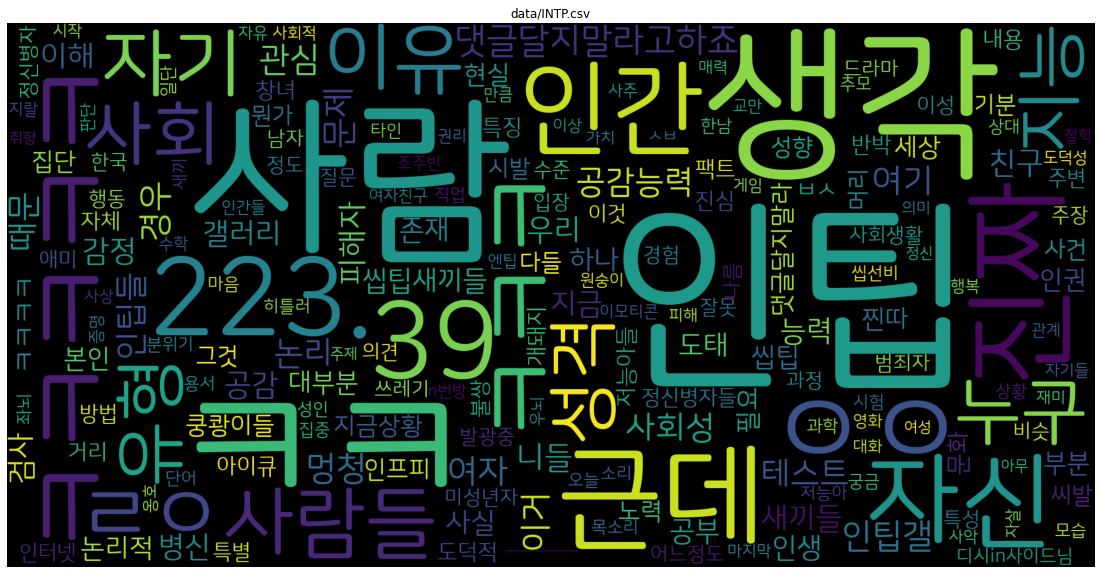

722it [00:04, 161.37it/s]


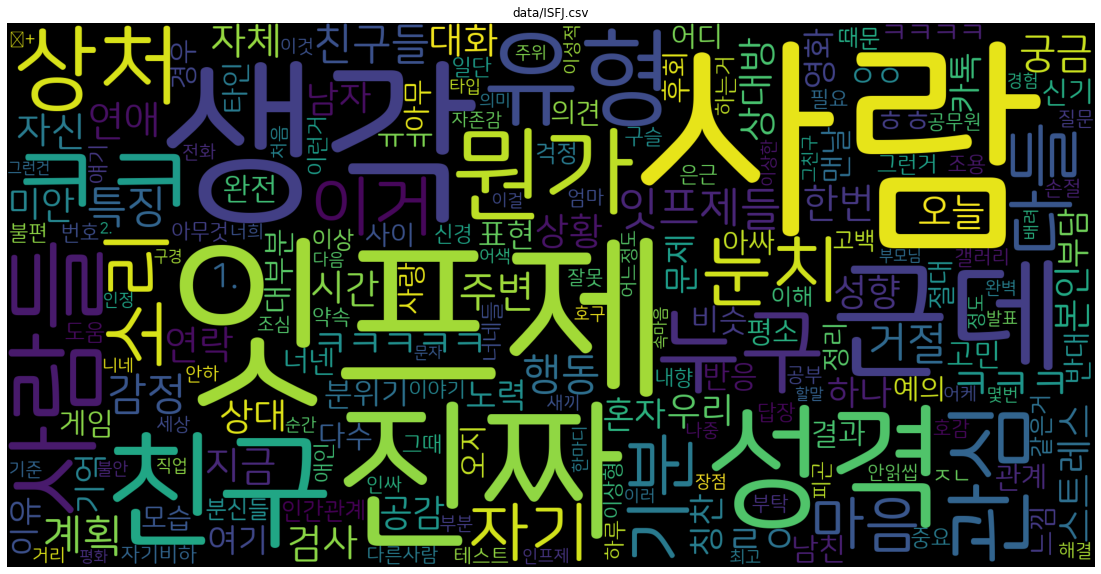

752it [00:03, 230.25it/s]


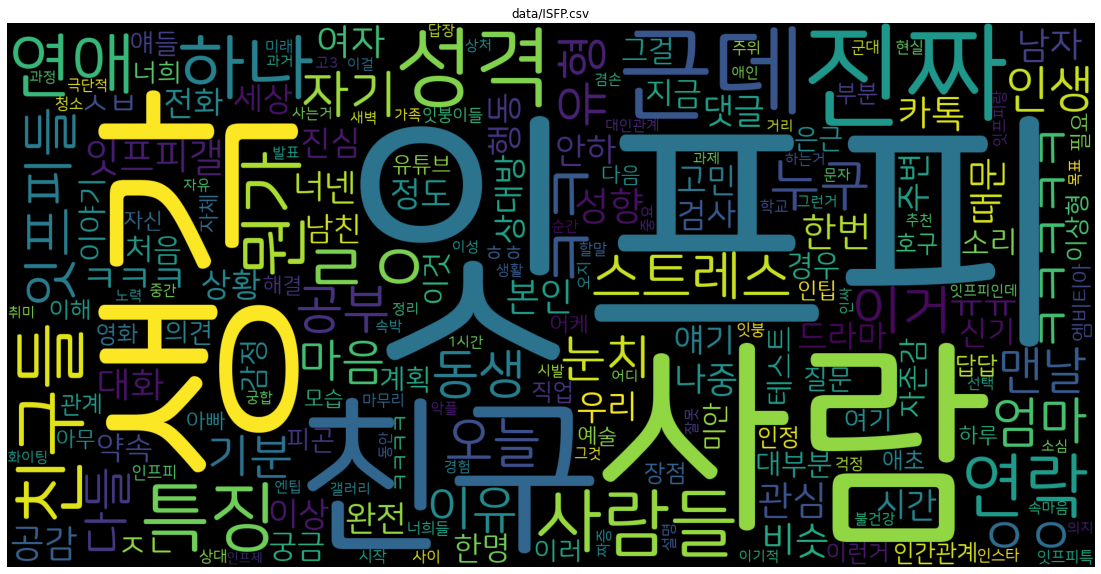

684it [00:04, 142.82it/s]


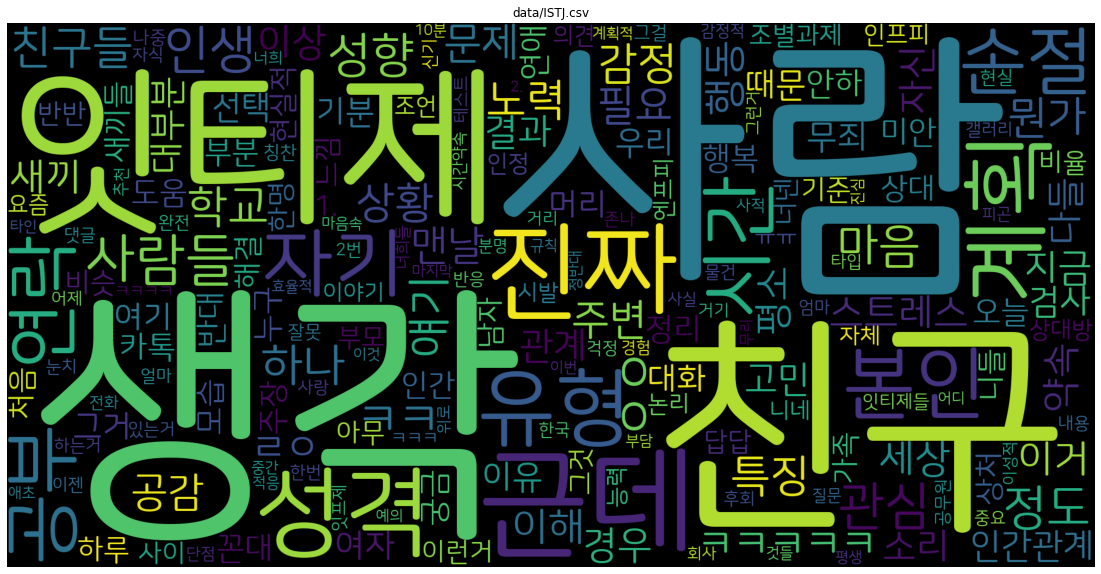

66it [00:00, 71.82it/s]


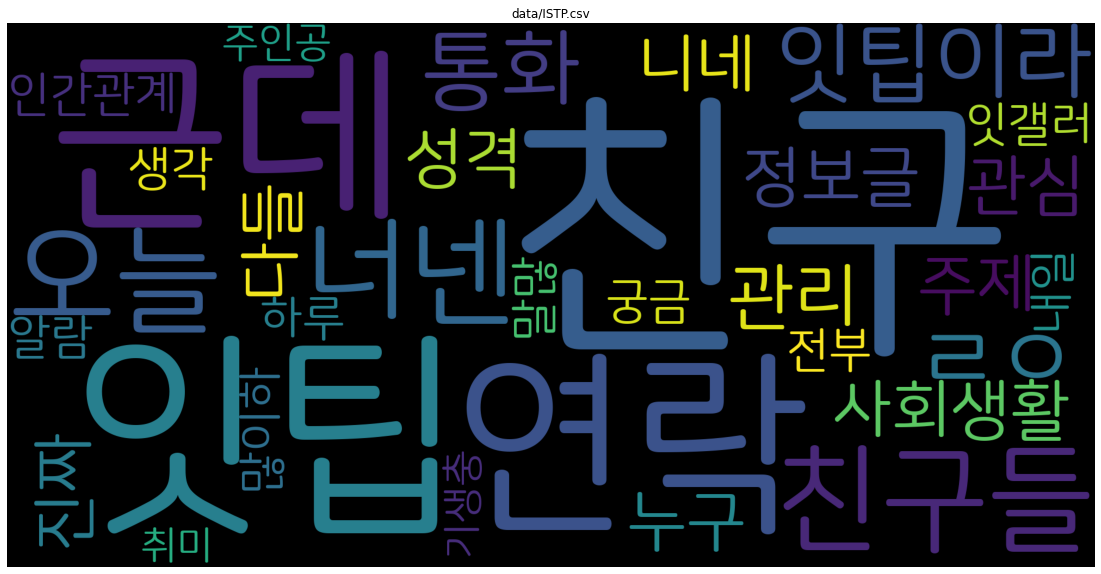

In [26]:
from glob import glob

for csv_path in sorted(glob('data/*.csv')):
    create_wordcloud(csv_path)